In [1]:
import os
os.chdir("../")

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.core.debugger import set_trace
from scipy.stats import rankdata
import matplotlib.colors as mcolors
import itertools as it
import functools as ft
import dataclasses
from typing import NamedTuple
from utils import generate
from more_itertools import chunked

In [3]:
%matplotlib widget

In [4]:
sns.set()

In [5]:
six_clusters = generate.generate_6_clusters()

In [37]:
class radius_weights:
    def __init__(self, radius):
        self.radius = radius
        
    def __call__(self, centroids, x):
        weights = np.linalg.norm(
            centroids[:, np.newaxis, :] - x, 
            axis=-1
        )
        return np.where(weights < self.radius, weights, 0)

In [40]:
weights[..., None].shape

(1200, 1200, 1)

In [41]:
def shift(centroids, x, weights_fn):
    weights = weights_fn(centroids, x)
    numerator = np.sum(weights[..., None] * x,  axis=1)
    denominator = np.sum(weights, axis=1) + np.finfo(float).eps
    denominator = denominator[:, None]
    new_centroids = numerator / denominator
    return new_centroids

In [56]:
def shift_till(x, weight_fn, eps=0.1,  verbose=True):
    distance = eps + 1
    centroids = x
    while eps < distance: 
        new_centroids = shift(centroids, x, weight_fn)
        distance = np.linalg.norm(centroids - new_centroids)
        if verbose:
            print(f"distance={distance}")
        centroids = new_centroids
    
        
        
def snap_till(x, weight_fn, eps=0.1,  verbose=True):
    distance = eps + 1
    centroids = x
    while eps < distance: 
        new_centroids = shift(centroids, x, weight_fn)
        yield new_centroids
        distance = np.linalg.norm(centroids - new_centroids)
        if verbose:
            print(f"distance={distance}")
        centroids = new_centroids
    
        

In [ ]:
list(shift_till(six_clusters, radius_weights(6)))

distance=92.19498446092328
distance=26.06906051660829
distance=13.670632752001655
distance=10.294907506505364
distance=7.9240680016752885
distance=6.413085507534321
distance=5.283946187483102
distance=3.7164449343232207
distance=2.701133440354544
distance=1.9376519046446794
distance=1.556252352870246
distance=1.2922193374450222
distance=1.082596313630477
distance=0.919183454460035
distance=0.7659657117699769
distance=0.7409006561780183
distance=0.6928600559708806
distance=0.6970389179369066


In [55]:
shift_till(six_clusters, radius_weights(6))

distance=92.19498446092328
distance=26.06906051660829
distance=13.670632752001655
distance=10.294907506505364
distance=7.9240680016752885
distance=6.413085507534321
distance=5.283946187483102
distance=3.7164449343232207
distance=2.701133440354544
distance=1.9376519046446794
distance=1.556252352870246
distance=1.2922193374450222
distance=1.082596313630477
distance=0.919183454460035
distance=0.7659657117699769
distance=0.7409006561780183
distance=0.6928600559708806
distance=0.6970389179369066
distance=0.5641759373931422
distance=0.5020495701351735
distance=0.5518641455701693
distance=0.568154730216925
distance=0.47564128167144665
distance=0.39952908174370644
distance=0.36976474114055735
distance=0.31273284194096174
distance=0.2089505642382841
distance=0.22359963050767093
distance=0.17612180686940135
distance=0.04708239760796724


In [35]:
def shift_means(x, eps, update_fn, verbo):
    distance = eps + 1
    centroids = x
    centroids_list = []
    centroids_list.append(centroids)
    while eps > distance: 
        weights = update_fn(centroids, x)
        new_centroids = (
            np.sum((np.expand_dims(weights, axis=-1) * x), axis=1) 
            / (np.finfo(float).eps + np.expand_dims(np.sum(weights, axis=1), axis=1))
        )
        distance = np.linalg.norm(centroids - new_centroids)
        print(distance)
        centroids = new_centroids
        centroids_list.append(centroids)



30.47958746377328
14.735510385957681
5.799988179852353
2.9398504955298415
1.8539407240786359
0.959986329620958
0.9795019750844487
0.7899426071607742
0.32532282516169275
0.20964075736699206
0.032484267323114935
0.015349195014825543
0.007343932268664654
0.003568033932377428
0.0017635471470205438


In [12]:
centroids = six_clusters

In [16]:
centroids[:, None, :].shape

(1200, 1, 2)

In [18]:
np.linalg.norm(
        centroids[:, None, :] - six_clusters, 
        axis=-1
    )

array([[0.        , 3.38644271, 1.02351682, ..., 5.91836623, 5.80164059,
        4.49002809],
       [3.38644271, 0.        , 2.36629381, ..., 9.14330107, 9.11513331,
        7.84023837],
       [1.02351682, 2.36629381, 0.        , ..., 6.89738939, 6.80887824,
        5.50693064],
       ...,
       [5.91836623, 9.14330107, 6.89738939, ..., 0.        , 0.75024393,
        1.74323904],
       [5.80164059, 9.11513331, 6.80887824, ..., 0.75024393, 0.        ,
        1.3562293 ],
       [4.49002809, 7.84023837, 5.50693064, ..., 1.74323904, 1.3562293 ,
        0.        ]])

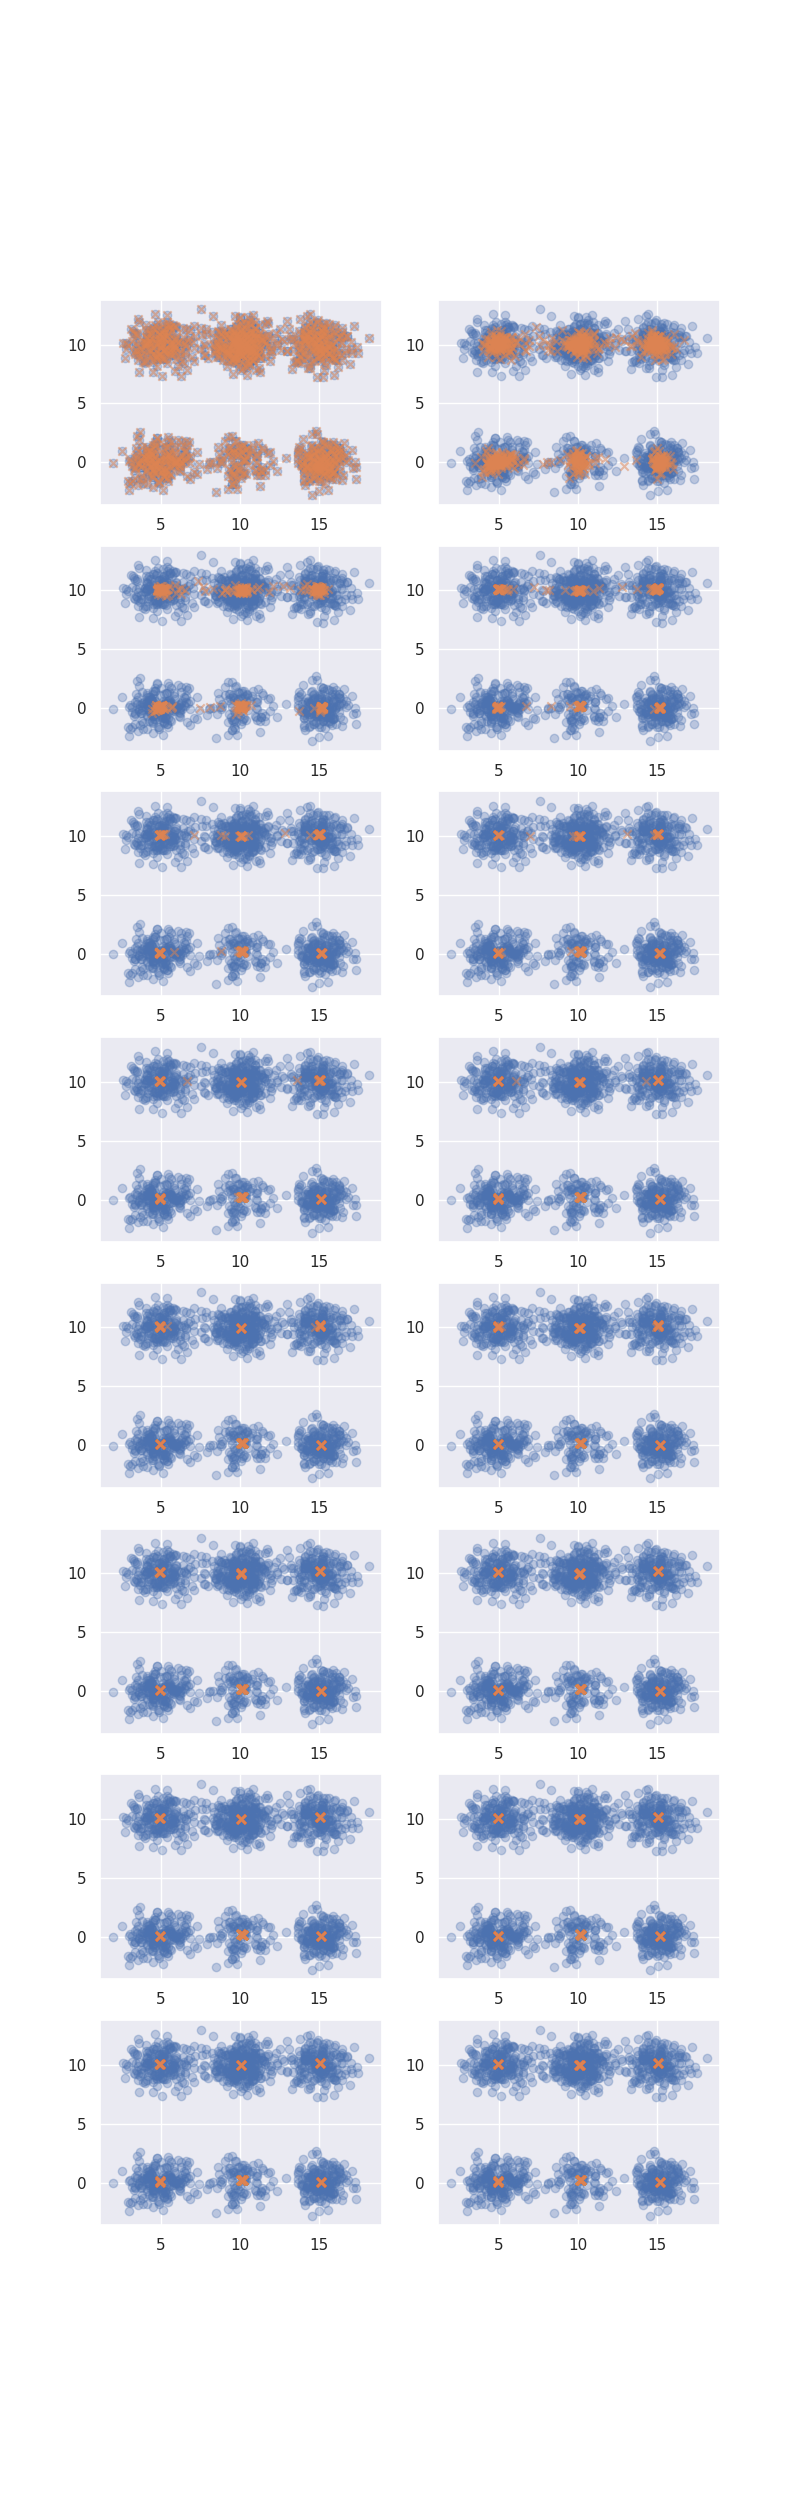

In [36]:
chuncks = list(chunked(centroids_list, 2))
fig, axes = plt.subplots(len(chuncks), 2, figsize=(8, 25))
axes = axes .ravel()
for ax, centroid in zip(axes, centroids_list):
    ax.scatter(*six_clusters.T, label='data', alpha=0.3)
    ax.scatter(*centroid.T, label='centroids', marker='x', alpha=0.5)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(*six_clusters.T, label='data')
ax.scatter(*centroids.T, label='centroids')
plt.show()

(1200, 1)

array([[ 9.94411143, 10.4074758 ],
       [ 9.54391354, 10.14352238],
       [10.1597809 , 10.12043028],
       ...,
       [14.78550951,  9.95702979],
       [15.25624591, 10.05184593],
       [14.9347468 ,  9.88341154]])

In [12]:
np.average(six_clusters[:, 0]), np.mean(six_clusters[:, 0])

(10.040874022085667, 10.040874022085667)